##  5-1 텐서플로에서 실행하는 단순 선형회귀

In [33]:
#######################################################
# [tf + keras] 단순선형회귀 : 공부시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')  # default learning rate: 0.01
# model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
history = model.fit(x, y, epochs=2000)

Epoch 1/2000


d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 9921.8926
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2283.4971
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1156.3031
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 985.4769
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 955.1514
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 945.4958
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 938.9097
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 932.8079
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 926.8107
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 920.8616
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 914.9524
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 909.0819
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 903.2493
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 897.4545
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step 

In [34]:
# 학습된 기울기(a)와 절편(b)을 출력합니다.
model.get_weights()

[array([[2.319269]], dtype=float32), array([78.88501], dtype=float32)]

In [35]:
model.predict(x) # y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[83.523544],
       [88.16209 ],
       [92.80062 ],
       [97.43916 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


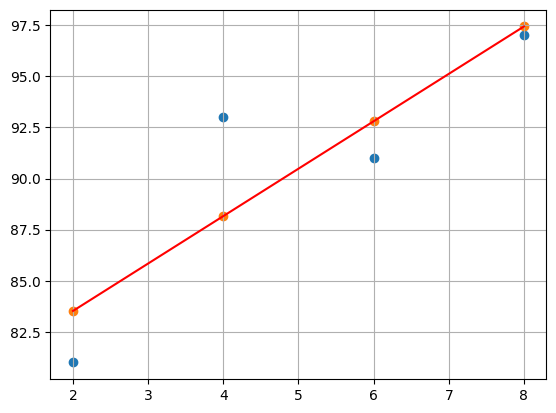

In [36]:
plt.scatter(x, y)
plt.scatter(x, model.predict(x))
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.grid()
plt.show()

In [37]:
# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7.0  # float로 넣어 주어야 함 (최근 버전)
prediction = model.predict(np.array([[hour]]))  # 반드시 2차원 array로 넣어 주어야 함

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


In [38]:
hour, prediction

(7.0, array([[95.11989]], dtype=float32))

In [39]:
model.get_weights()   # weight(a) 와 bias (b)

[array([[2.319269]], dtype=float32), array([78.88501], dtype=float32)]

In [40]:
history_dic = history.history #dictionary 형태로 반환됨
history_dic.keys()

dict_keys(['loss'])

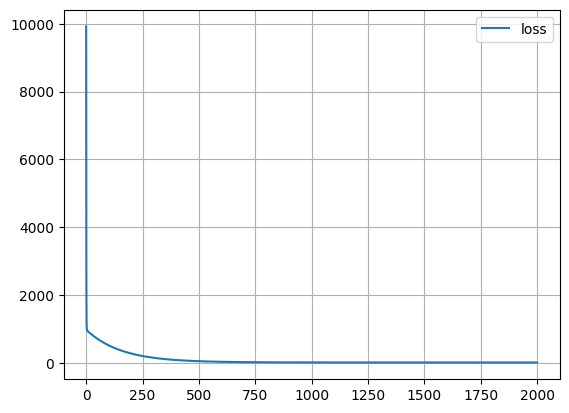

In [41]:
import pandas as pd 
pd.DataFrame(history.history).plot()
plt.grid()

## 5-2 텐서플로에서 실행하는 다중 선형회귀 모델

In [42]:
#######################################################
# [tf + keras] 다중선형회귀 : 공부시간&과외시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

# 데이터 준비
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

# 모델 만들기
model = Sequential()

#입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse') # sgd 대신 adam 등도 사용 가능
# model.compile(optimizer=SGD(learning_rate=0.05) ,loss='mse')

# 모델 실행 (train 수행)
hist = model.fit(x, y, epochs=2000)

Epoch 1/2000


d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 7021.4004
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1358.5698
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 954.8004
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 920.9359
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 913.1226
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 907.1770
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 901.3983
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 895.6663
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 889.9724
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 884.3157
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 878.6959
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 873.1127
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 867.5657
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 862.0547
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step -

In [43]:
x

array([[2, 0],
       [4, 4],
       [6, 2],
       [8, 3]])

In [44]:
# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict(np.array([[hour, private_class]]), verbose=0) # 반드시 2차원 array로 넣어 주어야 함
                                    # [[7, 4]] 형태
                                    
prediction

array([[97.529106]], dtype=float32)

In [45]:
print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction[0][0]))

7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


In [46]:
hist.history['loss']

[7021.400390625,
 1358.56982421875,
 954.8003540039062,
 920.9358520507812,
 913.12255859375,
 907.177001953125,
 901.3982543945312,
 895.666259765625,
 889.972412109375,
 884.315673828125,
 878.6959228515625,
 873.1126708984375,
 867.565673828125,
 862.0547485351562,
 856.5794677734375,
 851.1397094726562,
 845.7351684570312,
 840.365478515625,
 835.0306396484375,
 829.7299194335938,
 824.463623046875,
 819.2312622070312,
 814.0323486328125,
 808.8671875,
 803.7349853515625,
 798.6358642578125,
 793.5695190429688,
 788.5354614257812,
 783.5338134765625,
 778.564208984375,
 773.62646484375,
 768.7202758789062,
 763.845458984375,
 759.0018920898438,
 754.1890869140625,
 749.4071044921875,
 744.6558837890625,
 739.9347534179688,
 735.2438354492188,
 730.5828857421875,
 725.95166015625,
 721.349853515625,
 716.7774047851562,
 712.2341918945312,
 707.7198486328125,
 703.2340698242188,
 698.7772827148438,
 694.3485717773438,
 689.9480590820312,
 685.57568359375,
 681.23095703125,
 676.91394

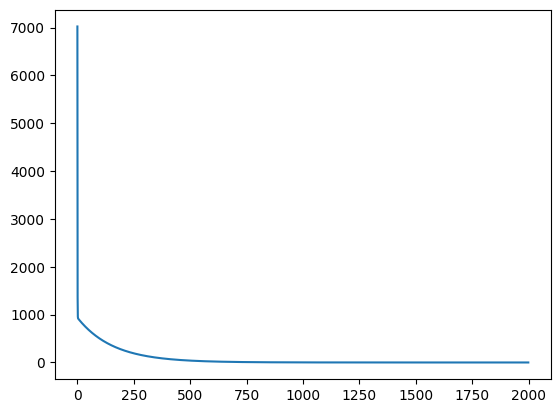

In [47]:
plt.plot(hist.history['loss'])

In [48]:
model.get_weights()   # [w1, w2], b

[array([[1.5192114],
        [2.2923481]], dtype=float32),
 array([77.725235], dtype=float32)]

epoch=0, 기울기=99.6571, 절편=9.9143  Cost=1.7354
epoch=100, 기울기=65.3714, 절편=1.3429  Cost=1.7354
epoch=200, 기울기=31.0857, 절편=-7.2286  Cost=1.7354
epoch=300, 기울기=2.0650, 절편=-14.2327  Cost=1.7494
epoch=400, 기울기=2.0706, 절편=-14.3300  Cost=1.7501
epoch=500, 기울기=2.0841, 절편=-14.4248  Cost=1.7499
epoch=600, 기울기=2.0974, 절편=-14.5183  Cost=1.7498
epoch=700, 기울기=2.1105, 절편=-14.6106  Cost=1.7496
epoch=800, 기울기=2.1235, 절편=-14.7017  Cost=1.7494
epoch=900, 기울기=2.1363, 절편=-14.7917  Cost=1.7492
epoch=1000, 기울기=2.1489, 절편=-14.8805  Cost=1.7491


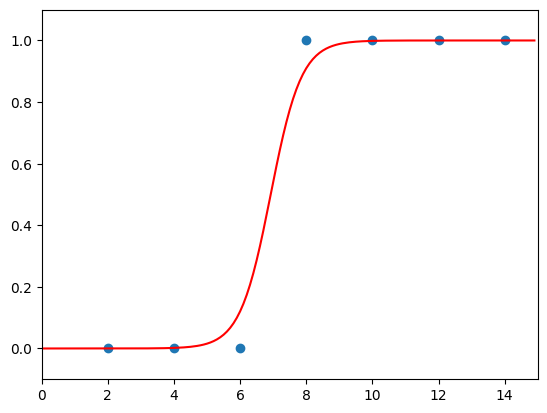

In [49]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 100, 10  # 기울기, 절편
lr = 0.1        # 학습률

#시그모이드 함수를 정의합니다.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    return - (Y * np.log(sigmoid(a * X + b)) +(1 - Y) * np.log(1 - sigmoid(X))).mean()

#경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수  
    
    a = a - lr * a_diff     # 실수
    b = b - lr * b_diff     # 실수
    if i % 100 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, a, b, cost(a, b)))
    
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(a * x_range + b),"r")
plt.show()


In [32]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]
Y = data[:, 1]

# weight와 bias의 초기값 설정
w, b = 1, 2     # 기울기, 절편
lr = 0.1       # 학습률
epoch = 5001    # 학습횟수

# 시그모이드 함수 정의
def sigmoid(w, b, X):
    return 1 / (1 + np.exp(-(w*X + b)))

# cost함수 정의  : Binary Cross Entropy
def cost(h):
    return (- (Y * np.log(h) + (1 - Y) * np.log(1 - h))).mean()

# 경사 하강법 실시
for i in range(epoch):
    error = sigmoid(w, b, X) - Y  # 각 x에서의 오차(편차)
    w_diff = (error * X).mean()     # cost를 w로 미분
    b_diff = error.mean()           # cost를 b로 미분

    # w와 b 업데이트
    w = w - lr * w_diff
    b = b - lr * b_diff
    h = sigmoid(w, b, X)
    
    if i % 200 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, w, b, cost(h)))


epoch=0, 기울기=0.8293, 절편=1.9574  Cost=2.2652
epoch=200, 기울기=0.2933, 절편=-1.3791  Cost=0.3656
epoch=400, 기울기=0.4888, 절편=-2.9470  Cost=0.2375
epoch=600, 기울기=0.6184, 절편=-3.9380  Cost=0.1870
epoch=800, 기울기=0.7170, 절편=-4.6750  Cost=0.1593
epoch=1000, 기울기=0.7977, 절편=-5.2706  Cost=0.1412
epoch=1200, 기울기=0.8668, 절편=-5.7759  Cost=0.1281
epoch=1400, 기울기=0.9276, 절편=-6.2183  Cost=0.1182
epoch=1600, 기울기=0.9823, 절편=-6.6141  Cost=0.1102
epoch=1800, 기울기=1.0322, 절편=-6.9740  Cost=0.1036
epoch=2000, 기울기=1.0783, 절편=-7.3051  Cost=0.0980
epoch=2200, 기울기=1.1212, 절편=-7.6126  Cost=0.0932
epoch=2400, 기울기=1.1614, 절편=-7.9005  Cost=0.0889
epoch=2600, 기울기=1.1993, 절편=-8.1715  Cost=0.0852
epoch=2800, 기울기=1.2353, 절편=-8.4280  Cost=0.0818
epoch=3000, 기울기=1.2695, 절편=-8.6718  Cost=0.0788
epoch=3200, 기울기=1.3022, 절편=-8.9045  Cost=0.0761
epoch=3400, 기울기=1.3335, 절편=-9.1271  Cost=0.0735
epoch=3600, 기울기=1.3636, 절편=-9.3408  Cost=0.0712
epoch=3800, 기울기=1.3926, 절편=-9.5464  Cost=0.0690
epoch=4000, 기울기=1.4205, 절편=-9.7446  Cost=0.0670


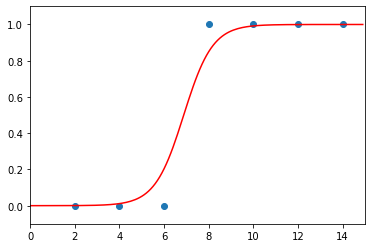

In [33]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(w, b, x_range),"r")
plt.show()